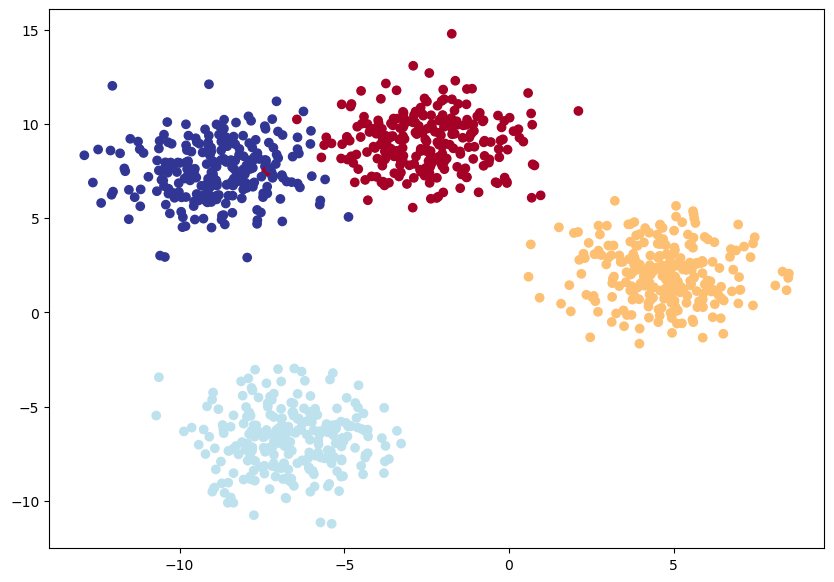

In [6]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

NUM_CLASSES=4
NUM_FEATURES = 2
X_blob, y_blob = make_blobs(1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=42)
X_blob = torch.from_numpy(X_blob).float()
y_blob = torch.from_numpy(y_blob).long()

X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob, y_blob, test_size=0.8, random_state=42)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap='RdYlBu')

In [7]:
from torch import nn
model_4 = nn.Sequential(
    nn.Linear(2,8),
    #nn.ReLU(),  #WITHOUT ReLU ,it still works! The boundary lines are straighter
    nn.Linear(8,8),
    #nn.ReLU(),
    nn.Linear(8,4),
    
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

model_4 

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=4, bias=True)
)

In [8]:
torch.manual_seed(42)

for epoch in range(100):
    model_4.train()
    
    logits = model_4(X_blob_train)
    preds = torch.softmax(logits, dim=1).argmax(dim=1)
    loss = loss_fn(logits, y_blob_train)

    optimizer.zero_grad();
    loss.backward()
    optimizer.step();
    
    if epoch % 10 == 0:
        print(f"{epoch}: Loss={loss}")

0: Loss=1.038961410522461
10: Loss=0.1346469670534134
20: Loss=0.07182896882295609
30: Loss=0.05080127343535423
40: Loss=0.04066833108663559
50: Loss=0.03477603197097778
60: Loss=0.03093840926885605
70: Loss=0.02824324183166027
80: Loss=0.026246218010783195
90: Loss=0.024706140160560608


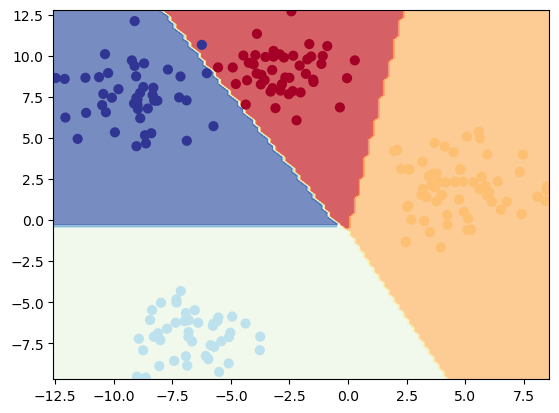

In [9]:
from helper_functions import plot_predictions, plot_decision_boundary

plot_decision_boundary(model_4, X_blob_train, y_blob_train)
